Import the Dependencies


In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data Collection and Analysis

PIMA Diabetes Dataset

In [4]:
# loading the dataset
diabetes_dataset= pd.read_csv("/diabetes.csv")

In [5]:
pd.read_csv?

In [6]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


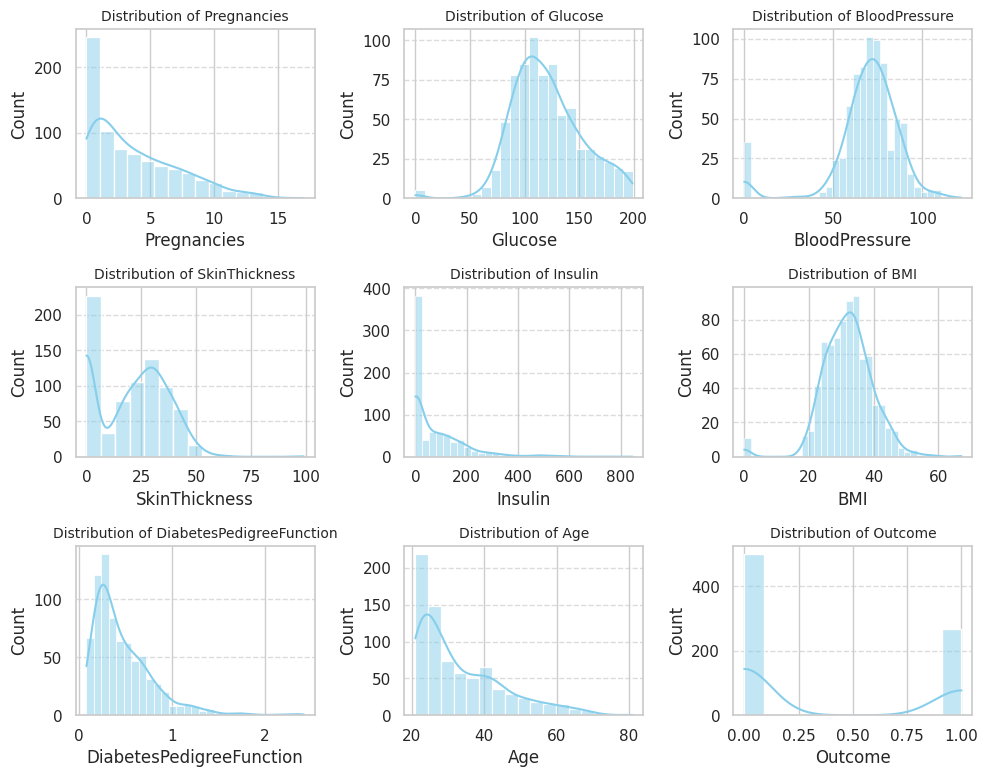

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for histograms
numeric_columns = diabetes_dataset.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size and number of subplots
num_columns = len(numeric_columns)
rows, cols = (num_columns // 3) + 1, 3  # Arrange subplots in rows and columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
axes = axes.flatten()  # Flatten to easily iterate through axes

# Plot each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=diabetes_dataset, x=column, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove unused axes
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: ylabel='Count'>

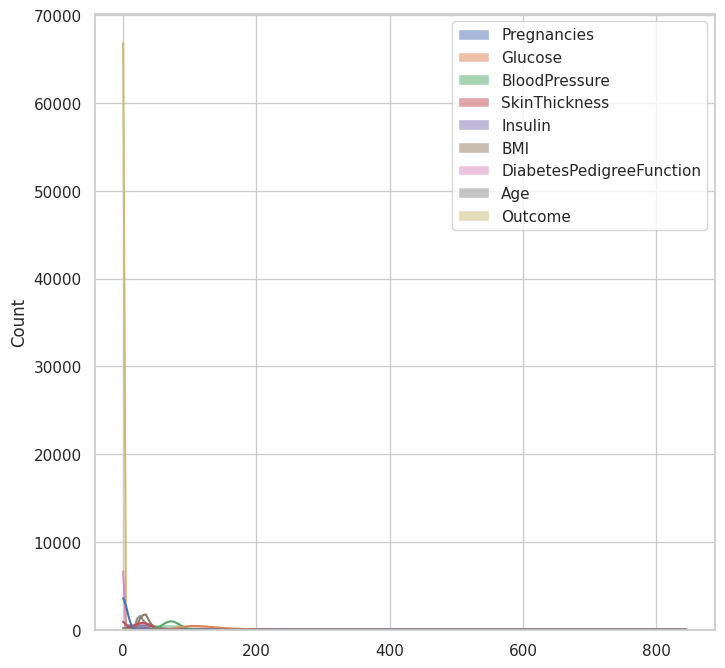

In [142]:
plt.figure(figsize=(8,8))
sns.histplot(data=diabetes_dataset, kde=True, color="Skyblue", bins=20)

<Figure size 800x800 with 0 Axes>

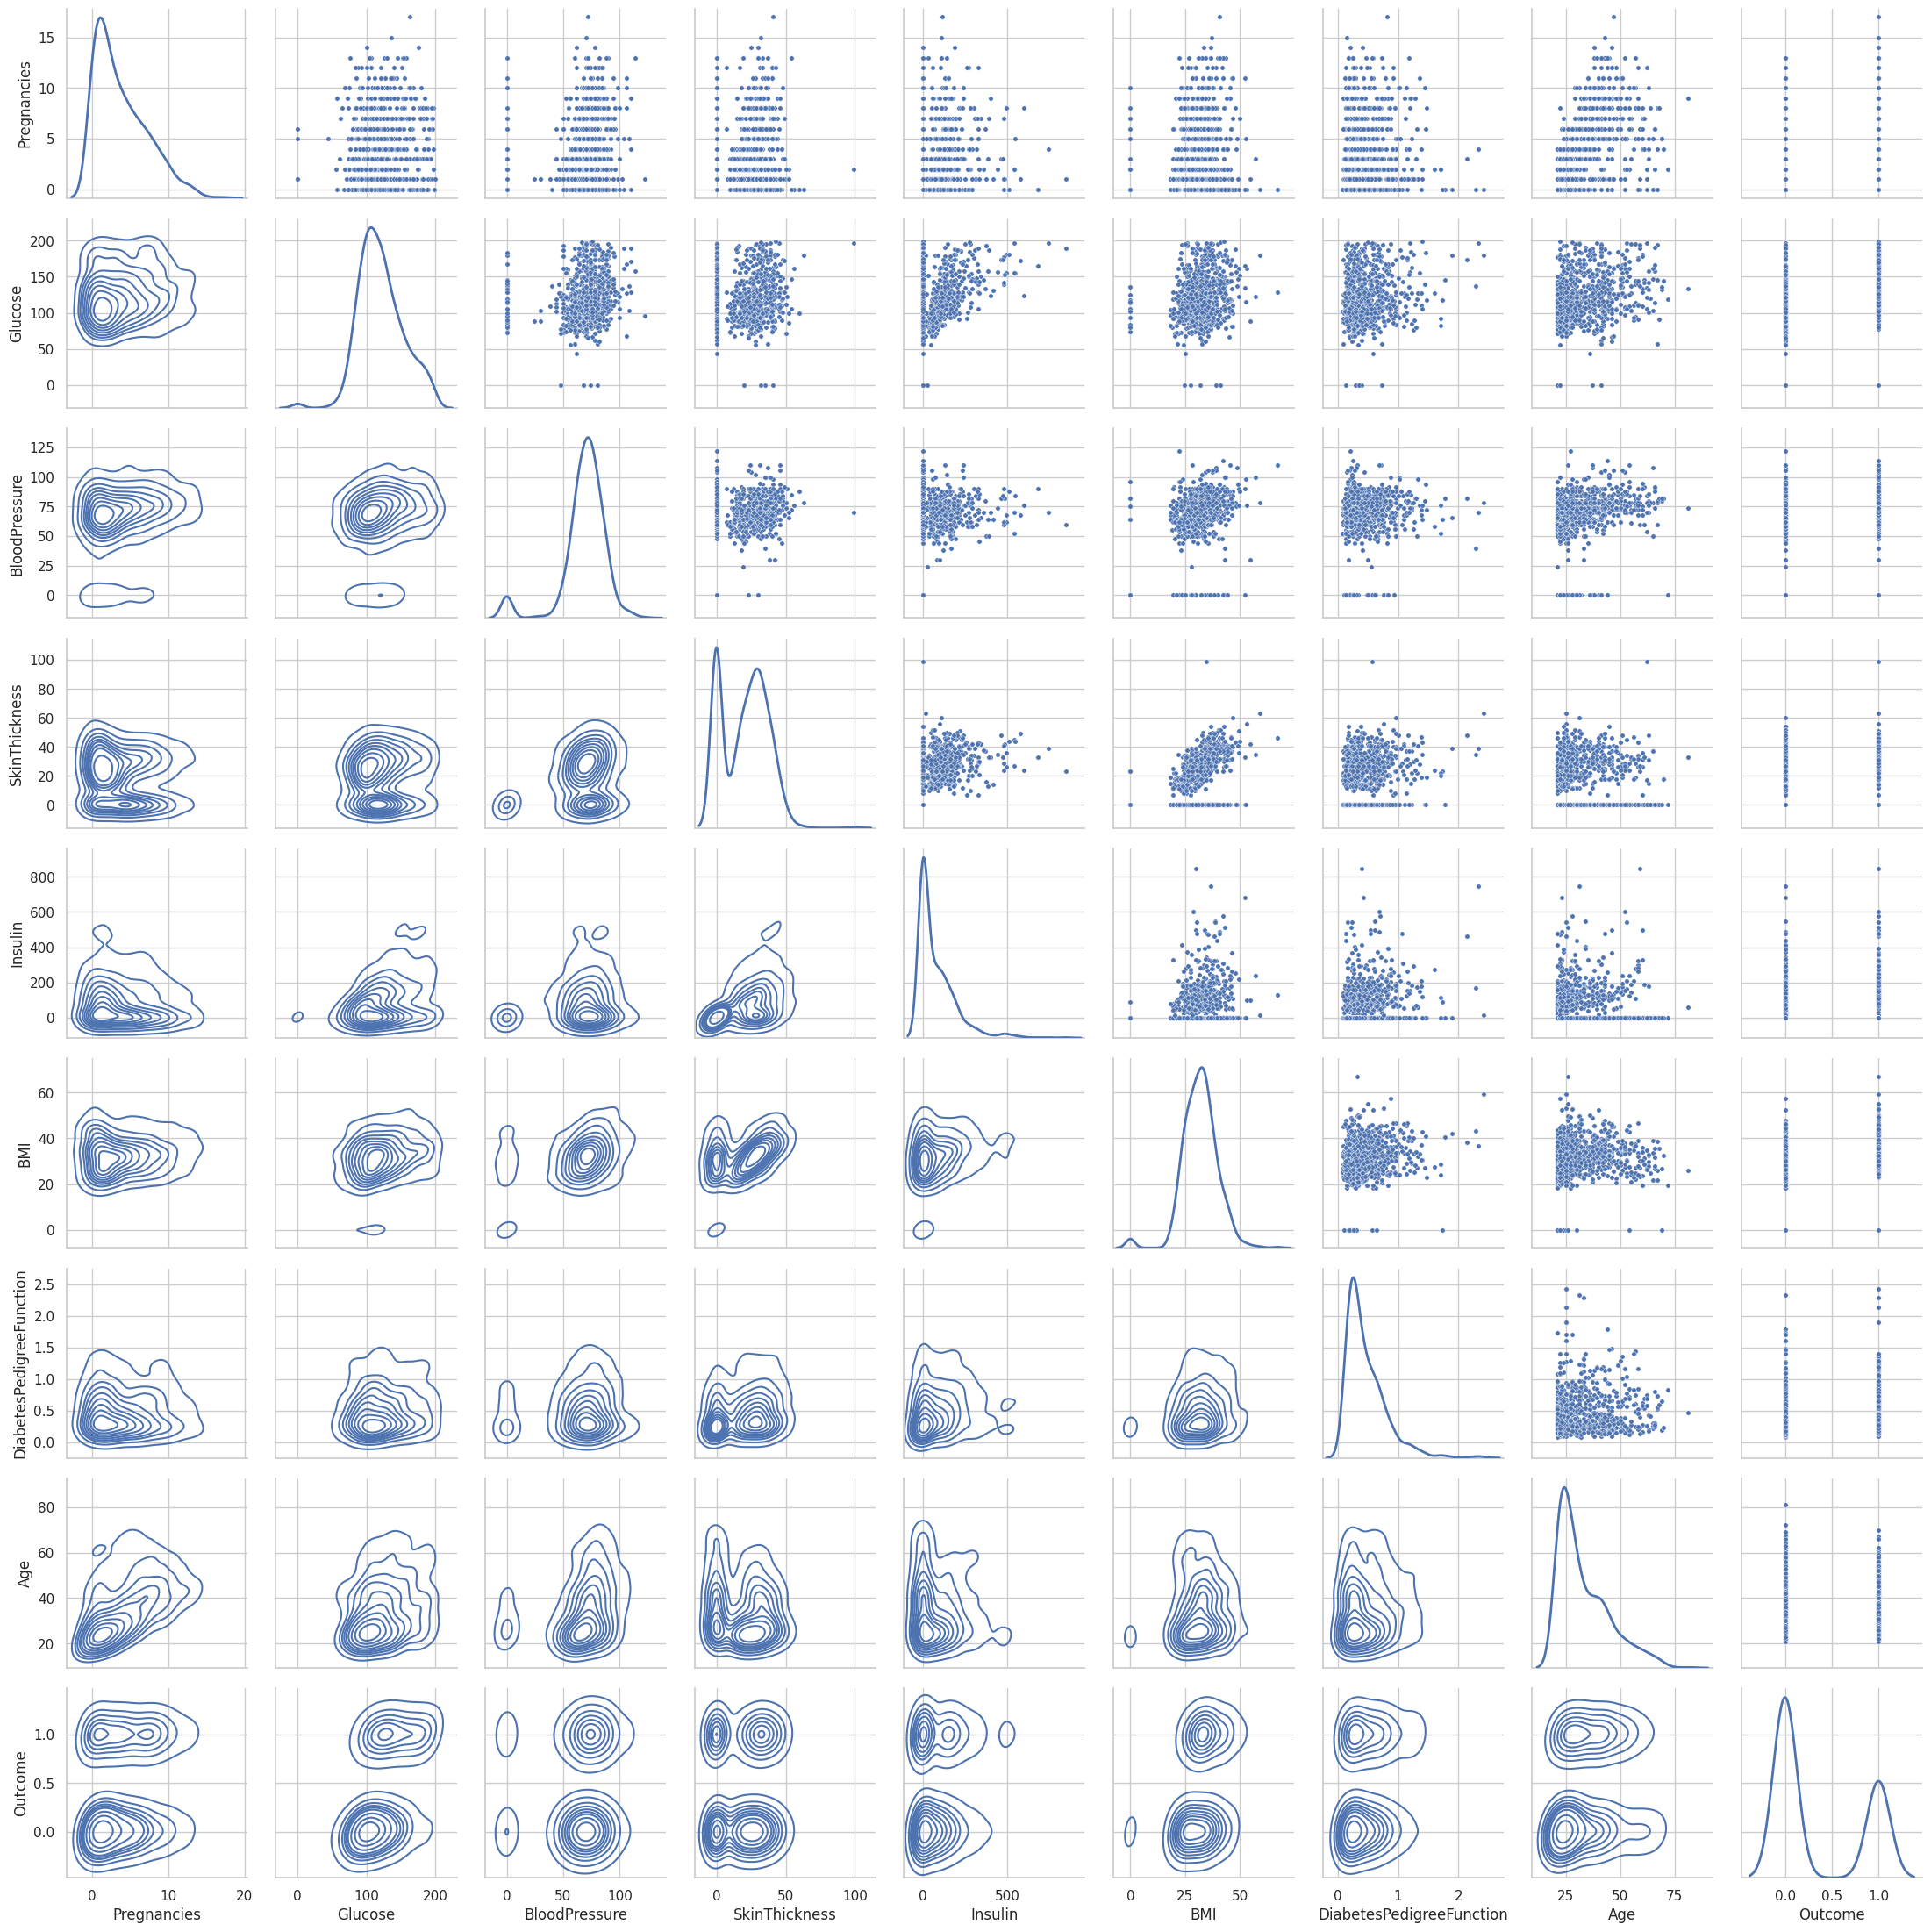

In [98]:
# we want to see relationship bewteen features
import seaborn as sns
plt.figure(figsize=(8,8))
sns.set_theme(style="whitegrid")

g = sns.PairGrid(diabetes_dataset, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

In [10]:
diabetes_dataset["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [77]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

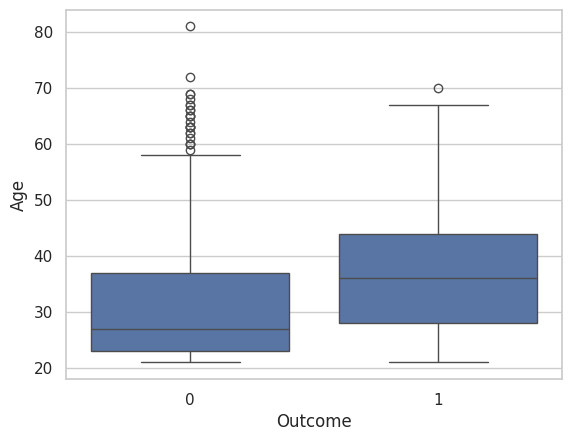

In [115]:
# we want to see outliers
sns.boxplot(x= "Outcome", y="Age", data=diabetes_dataset)
plt.show()

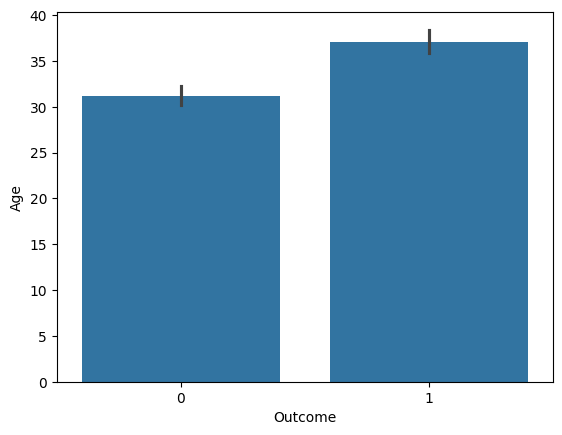

In [86]:
# we want to see total 1 and 0
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x="Outcome", y="Age", data=diabetes_dataset)
plt.show()

0 --> Non-Diabetic

1 --> Diabetic

In [11]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [12]:
# separating the data and labels
X= diabetes_dataset.drop(columns="Outcome", axis=1)
Y= diabetes_dataset["Outcome"]

In [13]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [14]:
scaler= StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [16]:
standardized_data= scaler.transform(X)

In [17]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


<Axes: ylabel='Count'>

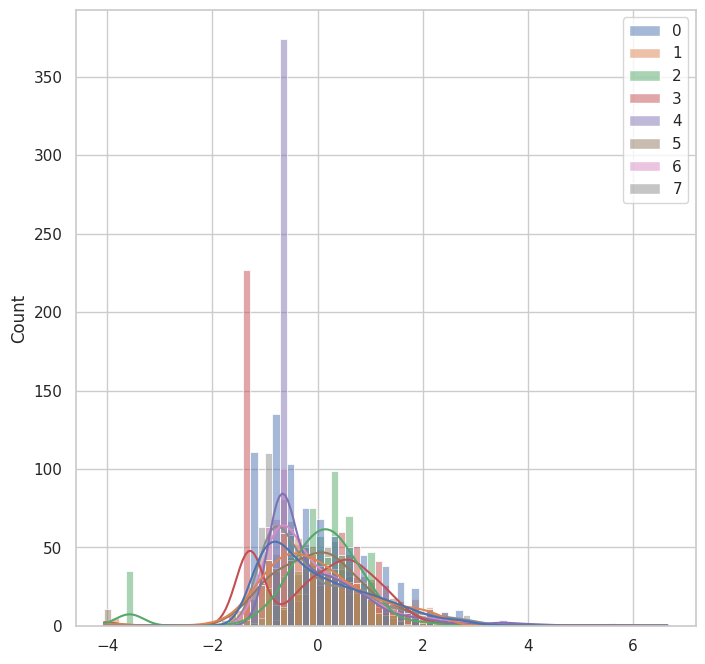

In [113]:
plt.figure(figsize=(8,8))
sns.histplot(data=standardized_data, kde=True, color="Skyblue")

In [18]:
X= standardized_data
Y= diabetes_dataset["Outcome"]

In [19]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train test split

In [20]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Train the Model

In [22]:
classifier= svm.SVC(kernel="linear")

Training the support vector machine classifier

In [23]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Model

In [24]:
# accuracy score on the traning data
x_train_prediction= classifier.predict(X_train)
training_data_accuracy= accuracy_score(x_train_prediction, Y_train)

In [25]:
print("Accuracy score of the training data: ", training_data_accuracy)

Accuracy score of the training data:  0.7866449511400652


In [26]:
# accuracy score on the traning data
x_test_prediction= classifier.predict(X_test)
test_data_accuracy= accuracy_score(x_test_prediction, Y_test)

In [27]:
print("Accuracy score of the test data: ", test_data_accuracy)

Accuracy score of the test data:  0.7727272727272727


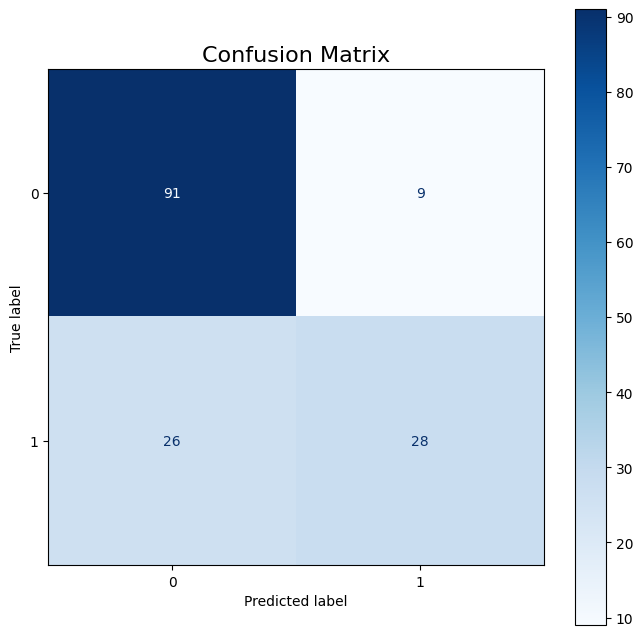

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming `model` is your trained classifier
#ConfusionMatrixDisplay.from_estimator(x_test_prediction, X_test, Y_test)
#plt.show()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(Y_test, x_test_prediction)

# Display confusion matrix
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())  # Plot on the current axis
plt.title("Confusion Matrix", fontsize=16)  # Add a title
plt.show()



Making a predictive system

In [132]:
input_data= (4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

# standarddize the input data
std_data= scaler.transform(input_data_reshaped)
print(std_data)

prediction= classifier.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")


[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


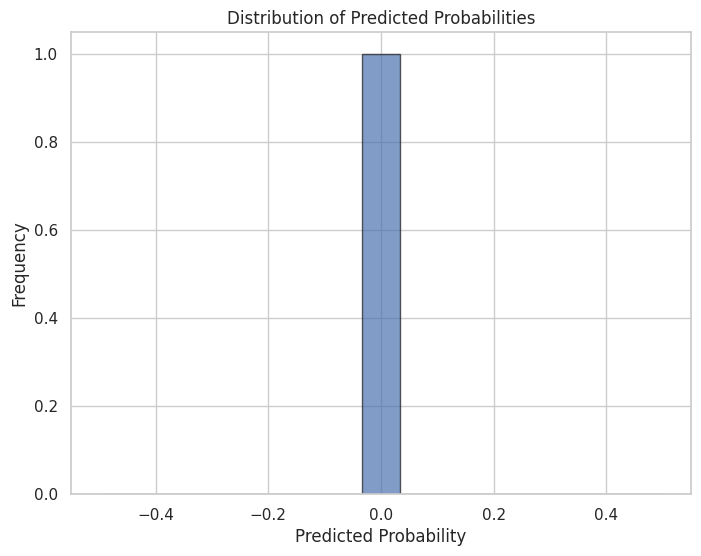

In [133]:
#probablity for single data
plt.figure(figsize=(8, 6))
plt.hist(prediction, bins=15, edgecolor='k', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [129]:
input_data= np.array([
                     [4,110,92,0,0,37.6,0.191,30],
                     [5,166,72,19,175,25.8,0.587,51],
                     [7,100,0,0,0,30,0.484,32],
                     [0,118,84,47,230,45.8,0.551,31],
                     [9,119,80,35,0,29,0.263,29]
])

#changing the input_data to numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

# standarddize the input data
std_data= scaler.transform(input_data)
print(std_data)

prediction2= classifier.predict(std_data)
print(prediction2)

if (prediction2[0] ==0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]
 [ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]
 [ 0.93691372 -0.65393918 -3.57259724 -1.28821221 -0.69289057 -0.25289651
   0.03661501 -0.10558415]
 [-1.14185152 -0.09059057  0.77001375  1.66000666  1.30417549  1.75242756
   0.23896296 -0.19067191]
 [ 1.53084665 -0.05929342  0.56322275  0.90726993 -0.69289057 -0.37981576
  -0.63083122 -0.36084741]]
[0 1 0 0 0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


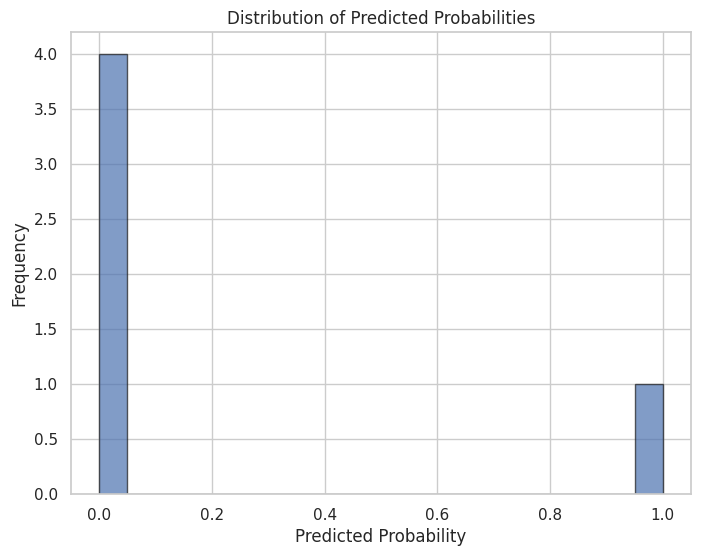

In [130]:
# probablity for assigning multiplte data point
plt.figure(figsize=(8, 6))
plt.hist(prediction2, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

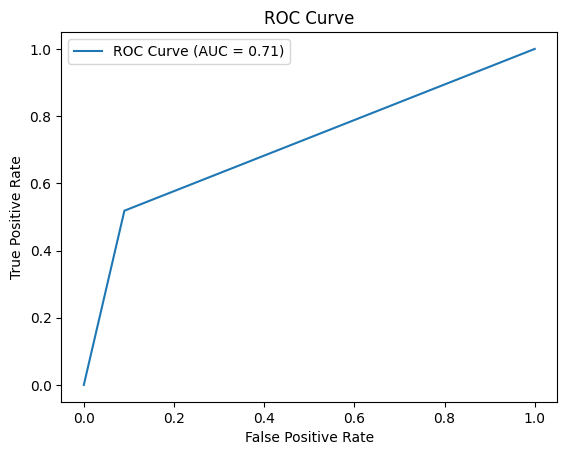

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(Y_test, x_test_prediction)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(Y_test, x_test_prediction)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


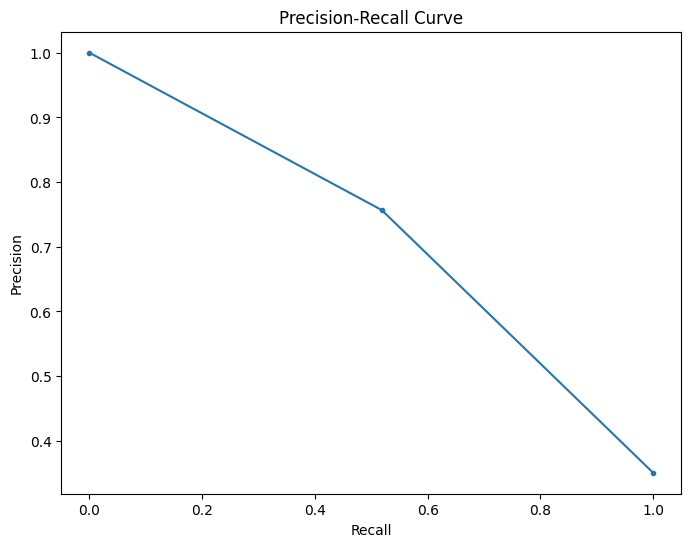

In [64]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(Y_test, x_test_prediction)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [65]:
diabetes_dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Step 1: Create or load a 2D dataset (e.g., Iris dataset with two features)
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # Taking only two features for 2D visualization
#y = iris.target

X1= diabetes_dataset.drop(columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction", "Age"], inplace=True)
Y1= diabetes_dataset["Outcome"]

# Split into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# Step 2: Train an SVM model
svm_model = SVC(kernel='linear')  # You can also use other kernels like 'rbf'
svm_model.fit(X1_train, Y1_train)

# Step 3: Plot decision boundaries
plt.figure(figsize=(8, 8))

# Create a grid of points to evaluate the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X1[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the grid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# Plot the support vectors
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o', label='Training Data')

# Add labels and title
plt.title("SVM Decision Boundaries and Support Vectors")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Show the plot
plt.show()
